#1. Importamos librerías y seteamos el entorno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from google.colab import drive
drive.mount('/drive/')

Mounted at /drive/


In [2]:
import warnings
warnings.filterwarnings('ignore')

#2. Ejemplo de KNN

In [3]:
X = np.asarray(([2,1,3,5,3,10,9,5,8,11,15,13,16],[1,0,3,5,2,12,11,10,7,9,11,15,16])).T
y = np.asarray([0,0,0,0,0,1,1,1,1,1,2,2,2])[:,np.newaxis]

print('X=\n',X)
print('y=\n',y)

X=
 [[ 2  1]
 [ 1  0]
 [ 3  3]
 [ 5  5]
 [ 3  2]
 [10 12]
 [ 9 11]
 [ 5 10]
 [ 8  7]
 [11  9]
 [15 11]
 [13 15]
 [16 16]]
y=
 [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]]


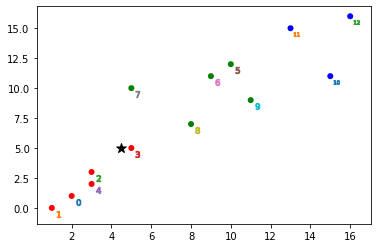

In [4]:
N = len(y)

X_class = np.asarray(([4.5],[5])).T #punto de consulta

pos_class0 = np.where(y==0)[0] #puntos de la clase 0 
pos_class1 = np.where(y==1)[0] #puntos de la clase 1
pos_class2 = np.where(y==2)[0] #puntos de la clase 2

plt.scatter(X[pos_class0,0], X[pos_class0,1], color='r', edgecolor='') #class0 = 0
plt.scatter(X[pos_class1,0], X[pos_class1,1], color='g', edgecolor='') #class1 = 1
plt.scatter(X[pos_class2,0], X[pos_class2,1], color='b', edgecolor='') #class2 = 2
plt.scatter(X_class[:,0], X_class[:,1], marker='*', s=100, c='k') #Clases a determinar

for i in range(N): 
    plt.scatter(X[i,0]+0.3, X[i,1]-0.5, s=40, marker="$ {} $".format(i)) #posiciones

In [16]:
#1. Generamos una instancia del clasificador KNN usando sklearn
number_neighs = 3
neighs = KNeighborsClassifier(n_neighbors=number_neighs)

# 2. Hacemos el fit entre la data X y las etiquetas
neighs.fit(X, y)

# 3. Clasificamos el punto X_q
print("El punto {} pertenece a la clase {} con {} vecinos cercanos".format(X_class, int(neighs.predict(X_class)),number_neighs))


El punto [[4.5 5. ]] pertenece a la clase 0 con 3 vecinos cercanos


In [17]:
print("Las probabilidades de pertenecer a cada grupo son {}".format(neighs.predict_proba(X_class)))

Las probabilidades de pertenecer a cada grupo son [[1. 0. 0.]]


In [19]:
neighs.kneighbors(X_class, return_distance=True)

(array([[0.5       , 2.5       , 3.35410197]]), array([[3, 2, 4]]))

**Clasificando un data set**

In [20]:
# 1. Definimos nuestro dataset para clasificar
X_test = np.asarray(([3,5,9,11,16],[1,2,9,8,14])).T
y_test = np.asarray([0,0,0,1,2])[:,np.newaxis]

# 2. Imprimimos el dataset
print('X_test=\n',X_test)
print('y_test=\n',y_test)

X_test=
 [[ 3  1]
 [ 5  2]
 [ 9  9]
 [11  8]
 [16 14]]
y_test=
 [[0]
 [0]
 [0]
 [1]
 [2]]


In [21]:
out_class = neighs.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_knn = pd.DataFrame(confusion_matrix(y_test, out_class))

In [23]:
confusion_knn

,0,1,2
0,2,1,0
1,0,1,0
2,0,0,1


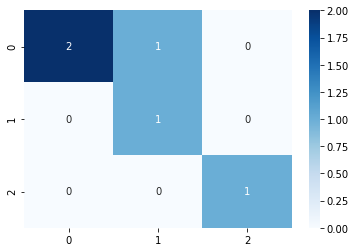

In [24]:
import seaborn as sns
fig_dims = (2, 2)
sns.heatmap(confusion_knn, annot=True, cmap='Blues')

#3. Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X_test)

In [27]:
 print("Number of mislabeled points out of a total %d points: %d"% (X_test.shape[0], (y_test != y_pred.reshape(5,1)).sum()))

Number of mislabeled points out of a total 5 points: 1
